A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import r2_score

In [3]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")
df.shape
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### 1 Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

Estas son las columnas más relacionadas:

Passes completed - Passes

subs on -subs off

Touches - Passes completed

Touches - Passes

### ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [4]:
df2 = df.copy()
for column in df.columns:
    if df2[column].dtypes == object:
        if column == "Team":
            continue
        else:
            df2[column] = df2[column].str.replace('%', '').astype(float)

In [5]:
df2['Shooting Accuracy'].corr(df2['Goals'])

0.5212095324544347

In [8]:
df2.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


In [6]:
# X = Shooting Accuracy
# y = goles
# Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     float64
 5   % Goals-to-shots            16 non-null     float64
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [7]:
X = df2["Shooting Accuracy"]
X = np.array(X).reshape(-1,1)
y = np.array(df2["Goals"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Regresion Lineal:

accuracy= 0.295039096816579


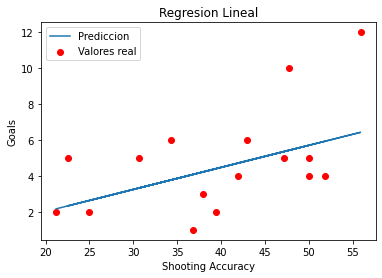

In [8]:
#Regresión Lineal
model_lin_reg2 = LinearRegression()
model_lin_reg2.fit(X_train,y_train)
accuracy = model_lin_reg2.score(X_test, y_test)
print("accuracy=",accuracy) 

plt.scatter(X, y, color='red',label= "Valores real")
plt.plot(X, model_lin_reg2.predict(X), label="Prediccion") 
plt.title("Regresion Lineal")
plt.xlabel("Shooting Accuracy")
plt.ylabel("Goals")
plt.legend()
plt.show()

In [9]:
coef_df = pd.DataFrame(data=model_lin_reg2.coef_, columns=["Coeficiente"])
coef_df

,Coeficiente
0,0.122684


## Regresión no Lineal con polinomio:

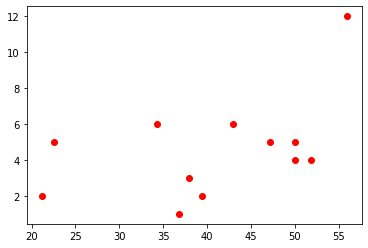

In [10]:
plt.scatter(X_train, y_train, color='red') #ME ayuda a saber que degree ponerle al de polinomio

0.9474155629043766


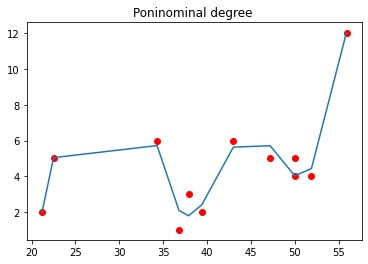

In [11]:
#Regresión no Lineal con polinomio
model_poli = PolynomialFeatures(7) 
X_poly = model_poli.fit_transform(X_train, y_train)
model_poli_lin = LinearRegression()
model_poli_lin.fit(X_poly, y_train)
y_pred = model_poli_lin.predict(X_poly)
accuracy = r2_score(y_train, y_pred)
print(accuracy)

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red', label ="valores reales")
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, label= "Prediccion")
plt.title("Poninominal degree ")
plt.show()

In [12]:
coef_df1 = pd.DataFrame(data=model_poli_lin.coef_, columns=["Coeficiente"])
coef_df1

,Coeficiente
0,0.000000e+00
1,-5.334990e+03
2,4.516453e+02
3,-2.066753e+01
4,5.531390e-01
5,-8.675896e-03
6,7.398681e-05
7,-2.651097e-07


## SVR:

In [13]:
model_svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model_svr_rbf.fit(X_train,y_train)
accuracy = model_svr_rbf.score(X_test, y_test)
accuracy 


-1.1141414213352174

-0.5216249798096955


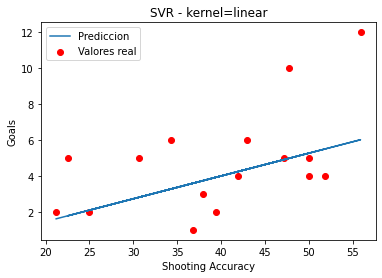

In [17]:
model_svr_lin = SVR(kernel='linear', C=100, gamma='auto')
model_svr_lin.fit(X_train,y_train)
accuracy = model_svr_lin.score(X_test, y_test)
print(accuracy)

plt.scatter(X, y, color='red',label= "Valores real")
plt.plot(X, model_svr_lin.predict(X), label="Prediccion") 
plt.title("SVR - kernel=linear")
plt.xlabel("Shooting Accuracy")
plt.ylabel("Goals")
plt.legend()
plt.show()


In [18]:
coef_df2 = pd.DataFrame(data=model_svr_lin.coef_, columns=["Coeficiente"])
coef_df2

,Coeficiente
0,0.126795


In [19]:
model_svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
model_svr_poly.fit(X_train, y_train)
accuracy = model_svr_poly.score(X_test, y_test)
accuracy 


-917746199.1624137

### Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

### % de goles por disparo: 40%
### Total shots (inc. Blocked): 102
### Corners Taken: 5
### Passes: 82
### Dribbles: 23

In [14]:
df2.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


In [97]:
#to_pred = [40.0, 102, 5, 82, 23] 
y2 = df2["Goals"]
X2 = df2[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]]
X2 = np.array(X2)

In [79]:
 le = LabelEncoder 
y2 = le.fit_transform(y2)

In [101]:
svc_rbf = SVC(kernel='rbf', C=100, gamma=100)
svc_lin = SVC(kernel='linear', C=C)
log_reg = LogisticRegression(n_jobs=-1)
rfc = RandomForestClassifier(n_estimators=1000, verbose=0, n_jobs=5)

models_list = [svc_rbf, svc_lin, log_reg, rfc]

for pos, model in enumerate(models_list):
    model.fit(X2, y2)
    y_pred = model.predict([[40.0, 102, 5, 82, 23]])
    print("Goals predicted with", model,"Prediction = ", y_pred)
    score = model.score(X2, y2)
    print('score:', score)
    print("-----")

Goals predicted with SVC(C=100, gamma=10) Prediction =  [4]
score: 1.0
-----
Goals predicted with SVC(C=100, kernel='linear') Prediction =  [0]
score: 1.0
-----
Goals predicted with LogisticRegression(n_jobs=-1) Prediction =  [4]
score: 0.75
-----
Goals predicted with RandomForestClassifier(n_estimators=1000, n_jobs=5) Prediction =  [4]
score: 1.0
-----
